In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1506945533408218240
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2907098318
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16039504808941459091
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras import layers
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
import cv2,os

train_path = "E:\Chest X ray New Dataset\train"
test_path = "E:\Chest X ray New Dataset\val"

## Importing Dataset from local machine 

In [3]:
data_path=r"E:\Chest X ray New Dataset\train"
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'COVID': 0, 'NORMAL': 1, 'PNEUMONIA BACTERIA': 2, 'PNEUMONIA VIRUS': 3}
['COVID', 'NORMAL', 'PNEUMONIA BACTERIA', 'PNEUMONIA VIRUS']
[0, 1, 2, 3]


## Data Preprocessing of training dataset using openCv 

In [4]:
img_size=224
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
          lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
          lab_planes = cv2.split(lab)
          clahe = cv2.createCLAHE(clipLimit=5,tileGridSize=(8,8))
          lab_planes[0] = clahe.apply(lab_planes[0])
          lab = cv2.merge(lab_planes)
          bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
          resized=cv2.resize(bgr,(img_size,img_size))
          data.append(resized)
          target.append(label_dict[category])
          #appending the image and the label(categorized) into the list (dataset)
          
          

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

## Data Reshaping of train Dataset 

In [5]:
import numpy as np


data=np.array(data)
data=data/255
data=np.reshape(data,(data.shape[0],img_size,img_size,3 ))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

#from sklearn.utils import shuffle
#data,Label = shuffle(data,new_target, random_state=2)
#train_data = [data,Label]

# Improve test Accuracy using Data augmentation


In [6]:

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_size,img_size,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

## Let's Create a CNN Model 

In [7]:
# CNN Based Model in Keras

#model=Sequential()
#model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(224,224,3)))
#model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation ="relu"))
#model.add(MaxPooling2D(pool_size=2))

#model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
#model.add(MaxPooling2D(pool_size=2))

#model.add(Conv2D(filters=128,kernel_size=3,padding="same",activation="relu"))
#model.add(MaxPooling2D(pool_size=2))

#model.add(Flatten())
#model.add(Dense(512,activation="relu"))
#model.add(Dropout(0.5))
#model.add(Dense(4,activation="softmax"))


#model = Sequential()

#model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.2))

#model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.2))

#model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.2))

#model.add(Flatten())
#model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.4))
#model.add(Dense(4, activation='softmax'))

#opt = keras.optimizers.Adam(lr=0.001)
#model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same',kernel_initializer='he_uniform', activation='relu'),
  layers.Conv2D(32, 3, padding='same',kernel_initializer='he_uniform', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.2),
  
  layers.Conv2D(64, 3, padding='same',kernel_initializer='he_uniform', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.2),
  layers.Conv2D(128, 3, padding='same',kernel_initializer='he_uniform', activation='relu'),
  layers.MaxPooling2D((2,2)),
  
  layers.Flatten(),
  layers.Dense(256,kernel_initializer='he_uniform', activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(4,activation='softmax')
])

opt = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


#model = Sequential()

#model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
#model.add(BatchNormalization())
#model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.3))

#model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.3))

#model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.3))

#model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.3))

#model.add(Flatten())
#model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
#model.add(Dense(4, activation='softmax'))
# compile model
#opt = keras.optimizers.Adam(lr=0.001)
#model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])







E:\Anaconda\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
model.summary()

In [ ]:
history=model.fit(data,new_target,epochs=35)

In [ ]:
checkpoint_path ="D:\Download(Chrome)\Covid-19 prediction CLAHE and CNN Checkpoint"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [ ]:
import tensorflow as tf
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    period=5)
model.save_weights(checkpoint_path.format(epoch=10))

## Data Preprocessing of Test Dataset using OpenCV

In [8]:
data_path1=r"E:\Chest X ray New Dataset\val"
categories=os.listdir(data_path1)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'COVID': 0, 'NORMAL': 1, 'PNEUMONIA BACTERIA': 2, 'PNEUMONIA VIRUS': 3}
['COVID', 'NORMAL', 'PNEUMONIA BACTERIA', 'PNEUMONIA VIRUS']
[0, 1, 2, 3]


In [10]:
img_size=224
data1=[]
target1=[]


for category in categories:
    folder_path=os.path.join(data_path1,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
          lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
          lab_planes = cv2.split(lab)
          clahe = cv2.createCLAHE(clipLimit=5,tileGridSize=(8,8))
          lab_planes[0] = clahe.apply(lab_planes[0])
          lab = cv2.merge(lab_planes)
          bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
          resized=cv2.resize(bgr,(img_size,img_size))
          data1.append(resized)
          target1.append(label_dict[category])
          #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [11]:

import numpy as np
data1=np.array(data1)/255.0
data1=np.reshape(data1,(data1.shape[0],img_size,img_size,3))
target1=np.array(target1)

from keras.utils import np_utils

new_target1=np_utils.to_categorical(target1)
#from sklearn.utils import shuffle
#data,Label = shuffle(data1,new_target1, random_state=2)
#test_data = [data,Label]

In [ ]:
#Model Evaluate using Above Trained Model
model.evaluate(data1,new_target1)

In [ ]:
import tensorflow as tf
latest = tf.train.latest_checkpoint(checkpoint_dir)
model.load_weights(latest)

model.evaluate(data1,new_target1)

In [ ]:
#This is Callback Stopped Training of data when validation loss will get increased
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [12]:
#history=model.fit(data,new_target,epochs=50,validation_data = (data1,new_target1),callbacks =[earlystopping])
history=model.fit(data,new_target,epochs=50,validation_data = (data1,new_target1))

Epoch 1/50
241/241 [==============================] - 122s 330ms/step - loss: 7.3554 - accuracy: 0.5334 - val_loss: 0.5527 - val_accuracy: 0.7894
Epoch 2/50
241/241 [==============================] - 48s 197ms/step - loss: 0.5740 - accuracy: 0.7849 - val_loss: 0.4911 - val_accuracy: 0.8135
Epoch 3/50
241/241 [==============================] - 46s 192ms/step - loss: 0.5326 - accuracy: 0.8051 - val_loss: 0.5266 - val_accuracy: 0.7985
Epoch 4/50
241/241 [==============================] - 43s 178ms/step - loss: 0.4948 - accuracy: 0.8146 - val_loss: 0.4348 - val_accuracy: 0.8371
Epoch 5/50
241/241 [==============================] - 43s 179ms/step - loss: 0.4622 - accuracy: 0.8314 - val_loss: 0.4451 - val_accuracy: 0.8348
Epoch 6/50
241/241 [==============================] - 43s 178ms/step - loss: 0.4590 - accuracy: 0.8325 - val_loss: 0.4511 - val_accuracy: 0.8276
Epoch 7/50
241/241 [==============================] - 43s 179ms/step - loss: 0.4603 - accuracy: 0.8289 - val_loss: 0.4286 - val_a

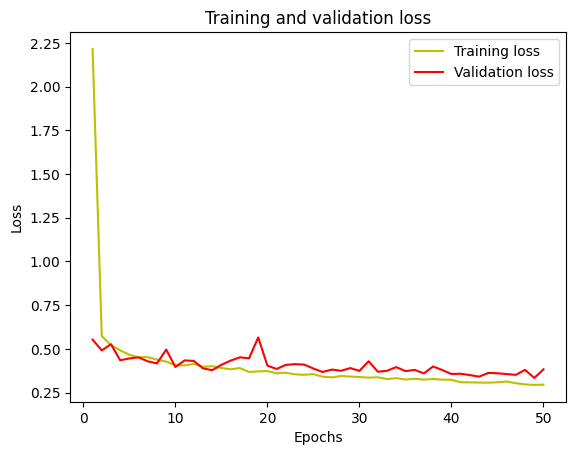

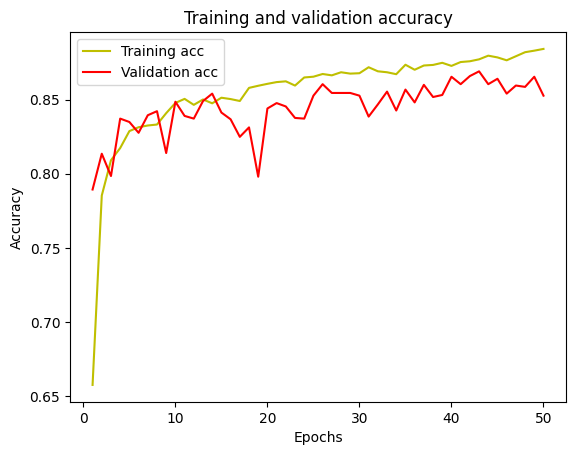

In [13]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Saving the Model 

In [14]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_Custom_CNN_COVID19_using_CLAHE_No_Overfit_TAcc88_VAcc85.model')

INFO:tensorflow:Assets written to: model_Custom_CNN_COVID19_using_CLAHE_No_Overfit_TAcc88_VAcc85.model\assets


INFO:tensorflow:Assets written to: model_Custom_CNN_COVID19_using_CLAHE_No_Overfit_TAcc88_VAcc85.model\assets


## Image Prediction

In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

#model=load_model('model_Custom_CNN_COVID19_using_CLAHE.h5')
#model=load_model('model_Custom_CNN_COVID19_using_CLAHE_KindOffOverFit_TAcc96_VAcc86.h5')
#model=load_model('model_Custom_CNN_COVID19_using_CLAHE_No_Overfit_TAcc85_VAcc85.model')
model=load_model('model_Custom_CNN_COVID19_using_CLAHE_No_Overfit_TAcc88_VAcc85.model')


In [16]:
y_pred = model.predict(data1)

import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, ..., 3, 2, 3], dtype=int64)

In [43]:
img_path = r"E:\Chest X ray New Dataset\test\PNEUMONIA BACTERIA\person413_bacteria_1829.jpeg"
img_size=224
img=cv2.imread(img_path)
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
lab_planes = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=5,tileGridSize=(8,8))
lab_planes[0] = clahe.apply(lab_planes[0])
lab = cv2.merge(lab_planes)
bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
resized=cv2.resize(bgr,(img_size,img_size))
x=image.img_to_array(resized)
x

array([[[244., 244., 244.],
        [237., 237., 237.],
        [242., 242., 242.],
        ...,
        [  8.,   9.,   8.],
        [  8.,   8.,   7.],
        [  6.,   6.,   6.]],

       [[245., 245., 245.],
        [243., 243., 243.],
        [237., 237., 237.],
        ...,
        [ 14.,  14.,  14.],
        [  8.,   8.,   8.],
        [  6.,   6.,   6.]],

       [[243., 243., 243.],
        [227., 227., 227.],
        [218., 218., 218.],
        ...,
        [ 11.,  11.,  11.],
        [ 13.,  13.,  13.],
        [ 11.,  11.,  11.]],

       ...,

       [[ 15.,  15.,  15.],
        [ 34.,  34.,  34.],
        [ 54.,  54.,  54.],
        ...,
        [ 64.,  64.,  64.],
        [ 63.,  63.,  63.],
        [ 64.,  64.,  64.]],

       [[ 17.,  17.,  17.],
        [ 40.,  40.,  40.],
        [ 54.,  54.,  54.],
        ...,
        [ 64.,  64.,  64.],
        [ 64.,  64.,  64.],
        [ 64.,  64.,  64.]],

       [[ 18.,  18.,  18.],
        [ 39.,  39.,  39.],
        [ 57.,  

In [44]:
x.shape

(224, 224, 3)

In [45]:
x=x/255
x=np.expand_dims(x,axis=0)
img1 = np.reshape(x,[1,224,224,3])
img1.shape

(1, 224, 224, 3)

In [46]:
model.predict(img1)

array([[1.2527607e-12, 2.0747439e-08, 9.5106560e-01, 4.8934370e-02]],
      dtype=float32)

In [47]:
a=np.argmax(model.predict(img1), axis=1)
if (a==0):
    print("COVID")
elif (a==1): 
    print("NORMAL")
elif (a==2):
    print("PNEUMONIA BACTERIA")
else :
    print("PNEUMONIA VIRUS")

PNEUMONIA BACTERIA


# Confusion Matrix

E:\Anaconda\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


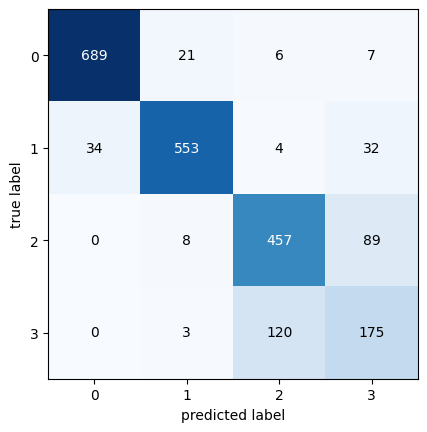

In [22]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


rounded_predictions = model.predict_classes(data1, batch_size=128, verbose=0)

import numpy as np
rounded_labels=np.argmax(new_target1, axis=1)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)
plot_confusion_matrix(conf_mat=cm)
plt.show()
